Es wird entschieden keine der Spalten zu löschen, da diese für eine spätere Analyse möglicherweise wichtig sind.
Vielmehr sollen für die Durchführung des LDAs lediglich englische Lieder im Datensatz behalten werden.

In [25]:
# Importe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import gensim.corpora as corpora

In [26]:
# song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')

# song_data = song_data[(song_data['Language'] == 'en')]

# song_data.to_csv("outData.csv", index=False)

song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\outData.csv')

song_data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
250192,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
250193,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
250194,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
250195,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


## Data Cleaning

In [27]:
# Remove the columns
song_data = song_data[['Genre', 'Lyrics']]
# Print out the first rows of papers
song_data

,Genre,Lyrics
0,Rock,"It starts with pain, followed by hate\nFueled ..."
1,Rock,Freedom!\nAlone again again alone\nPatiently w...
2,Rock,"Biting the hand that feeds you, lying to the v..."
3,Rock,You say you know just who I am\nBut you can't ...
4,Rock,My heart is beating faster can't control these...
...,...,...
250192,R&B,I'm the best friend he's got I'd give him the ...
250193,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
250194,Pop,Forgive me for the things That I never said to...
250195,Indie,The day they found a cure for AIDS The day the...


## Remove punctuation/lower casing

In [28]:
# Remove punctuation
song_data['song_text_processed'] = \
song_data['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
song_data['song_text_processed'] = \
song_data['song_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
song_data['song_text_processed'].head()

C:\Users\sdo\AppData\Local\Temp\ipykernel_2332\4218573345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['song_text_processed'] = \
C:\Users\sdo\AppData\Local\Temp\ipykernel_2332\4218573345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['song_text_processed'] = \


0    it starts with pain followed by hate\nfueled b...
1    freedom\nalone again again alone\npatiently wa...
2    biting the hand that feeds you lying to the vo...
3    you say you know just who i am\nbut you can't ...
4    my heart is beating faster can't control these...
Name: song_text_processed, dtype: object

## Exploratory Analysis

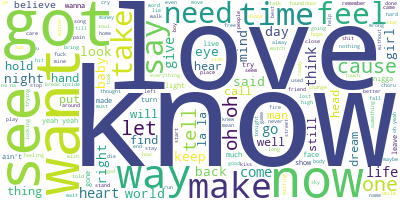

In [29]:
# Join the different processed titles together.
# long_string = ','.join(list(song_data['song_text_processed'].values))
# Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
# wordcloud.generate(long_string)
# Visualize the word cloud
# wordcloud.to_image()

## Prepare data for LDA Analysis

In [30]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = song_data.song_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['starts', 'pain', 'followed', 'hate', 'fueled', 'endless', 'questions', 'one', 'answer', 'stain', 'covers', 'heart', 'tears', 'apart', 'like', 'sleeping', 'cancer', 'believe', 'men', 'born', 'killers', 'believe', 'world', 'saved', 'get', 'start', 'innocent', 'child', 'thorn', 'heart']


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 4), (3, 6), (4, 1), (5, 3), (6, 1), (7, 1), (8, 2), (9, 5), (10, 2), (11, 1), (12, 1), (13, 4), (14, 4), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 3), (24, 6), (25, 4), (26, 2), (27, 1), (28, 3), (29, 4)]


## LDA model training

In [32]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"na" + 0.012*"back" + 0.012*"da" + 0.011*"oh" + 0.010*"get" + '
  '0.010*"like" + 0.010*"got" + 0.007*"roll" + 0.006*"good" + 0.006*"rock"'),
 (1,
  '0.014*"like" + 0.012*"one" + 0.012*"could" + 0.012*"way" + 0.010*"night" + '
  '0.009*"oh" + 0.008*"day" + 0.008*"love" + 0.008*"say" + 0.008*"come"'),
 (2,
  '0.028*"oh" + 0.016*"got" + 0.013*"la" + 0.012*"like" + 0.011*"know" + '
  '0.010*"ya" + 0.010*"nigga" + 0.008*"let" + 0.008*"get" + 0.007*"yeah"'),
 (3,
  '0.033*"want" + 0.020*"got" + 0.017*"get" + 0.016*"know" + 0.015*"time" + '
  '0.014*"let" + 0.012*"like" + 0.012*"say" + 0.011*"one" + 0.009*"baby"'),
 (4,
  '0.020*"know" + 0.011*"see" + 0.011*"life" + 0.010*"take" + 0.008*"way" + '
  '0.007*"like" + 0.007*"think" + 0.007*"never" + 0.007*"away" + '
  '0.007*"wanna"'),
 (5,
  '0.024*"get" + 0.016*"gonna" + 0.010*"come" + 0.009*"oh" + 0.009*"little" + '
  '0.009*"make" + 0.008*"like" + 0.008*"never" + 0.008*"got" + 0.007*"tell"'),
 (6,
  '0.053*"love" + 0.019*"know"

## Analyzing LDA model results

In [47]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os

# Define num_topics before using it
num_topics = 10  # Replace with your actual number of topics

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(LDAvis_data_filepath), exist_ok=True)

# This is a bit time-consuming - execute visualization prep yourself
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save HTML file
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

